In [1]:
import json
import spacy
import collections
import pandas as pd
import numpy as np
import seaborn as sns
from spacy.tokens import Span
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 基本情况

In [2]:
data_path = '/Users/ishi/PycharmProjects/NLP_Policy/NLP_Policy/data_process/datasets/entity.json'
with open(data_path, 'r') as f:
    raw_data = json.load(f)

In [3]:
raw_data = pd.DataFrame(raw_data)

In [4]:
raw_data

,sid,sentence,sentence_num,entity_list
0,410_1,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室嘉科综〔2018〕47号,44,"[[嘉兴市, 发布地区, [0, 2]], [嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融..."
1,410_2,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室关于印发《嘉兴市科技保险补贴实施办法...,44,"[[《嘉兴市科技保险补贴实施办法（试行）》, 政策名称, [32, 50]], [各县（市、..."
2,410_4,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室2018年6月19日嘉兴市科技保险补...,44,"[[2018年6月19日, 发布时间, [28, 37]]]"
3,410_40,第十八条 本办法自发布之日起试行。,44,"[[自发布之日起, 执行期限, [8, 13]]]"
4,411_1,区委办〔2018〕66号,40,"[[区委办〔2018〕66号, 政策文号, [0, 11]]]"
5,411_2,中共柯桥区委办公室柯桥区人民政府办公室关于印发2018年柯桥区金融支持实体经济发展考核奖励办...,40,"[[各镇（街道、开发区）党委（工委）、政府（办事处、管委会），区机关各部门, 执行部门, [..."
6,411_3,《2018年柯桥区金融支持实体经济发展考核奖励办法》已经区委、区政府同意，现印发给你们，请认...,40,"[[《2018年柯桥区金融支持实体经济发展考核奖励办法》, 政策名称, [0, 25]]]"
7,411_4,中共柯桥区委办公室柯桥区人民政府办公室2018年6月15日2018年柯桥区金融支持实体经济发...,40,"[[柯桥区, 发布地区, [2, 4]], [2018年6月15日, 发布时间, [19, ..."
8,413_1,嘉市监〔2018〕87号,38,"[[嘉市监〔2018〕87号, 政策文号, [0, 11]], [2018, 发布时间, [..."
9,413_3,各县（市、区）市场监管局（分局）、国税局、地税局、公安(分)局、行政审批服务中心（行政审批局）：,38,[[各县（市、区）市场监管局（分局）、国税局、地税局、公安(分)局、行政审批服务中心（行政审...


In [5]:
raw_data.shape

(59, 4)

## 实体分布

In [6]:
entity_dict = collections.defaultdict(int)

In [7]:
total_len = raw_data.shape[0]
for i in range(total_len):
    for entity in raw_data.loc[i, 'entity_list']:
        entity_dict[entity[1]] += 1

In [8]:
entity_dict

defaultdict(int,
            {'发布地区': 16,
             '制定部门': 13,
             '政策文号': 13,
             '政策名称': 16,
             '执行部门': 13,
             '发布时间': 11,
             '执行期限': 12})

In [9]:
all_entities = []
total_len = raw_data.shape[0]
for i in range(total_len):
    for entity in raw_data.loc[i, 'entity_list']:
        all_entities.append(entity)
print('number of all entities: ', len(all_entities))

number of all entities:  94


## 句子长度分布

max: 275
min: 11


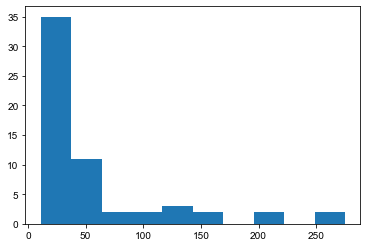

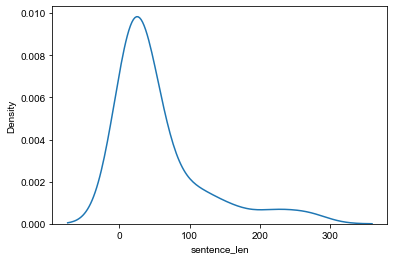

In [10]:
raw_data['sentence_len'] = raw_data['sentence'].apply(len)
print('max:', max(raw_data['sentence_len']))
print('min:', min(raw_data['sentence_len']))
plt.hist(raw_data['sentence_len'])
plt.show()
sns.kdeplot(raw_data['sentence_len'])
plt.show()

## spacy

In [18]:
nlp = spacy.blank("zh")

In [21]:
training_data = []
total_len = raw_data.shape[0]
for i in range(total_len):
    sentence = raw_data.loc[i, 'sentence']
    entity_list = []
    for entity in raw_data.loc[i, 'entity_list']:
        entity_list.append((entity[2][0], entity[2][1], entity[1]))
    training_data.append((sentence, entity_list))

In [32]:
training_data

[('嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室嘉科综〔2018〕47号',
  [(0, 2, '发布地区'), (0, 27, '制定部门'), (28, 39, '政策文号')]),
 ('嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室关于印发《嘉兴市科技保险补贴实施办法（试行）》的通知各县（市、区）科技局、财政局、金融办，嘉兴经济技术开发区、嘉兴港区管委会，市级有关部门：',
  [(32, 50, '政策名称'), (54, 96, '执行部门')]),
 ('嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室2018年6月19日嘉兴市科技保险补贴实施办法（试行）\xa0为切实加强区域科技保险的引导和推进力度，化解科技企业创新创业的风险，更好地提升嘉兴科技创新环境，根据嘉兴市人民政府办公室《关于支持科技保险发展的实施意见》（嘉政办发〔2015〕33号）等文件精神，特制定本实施办法。',
  [(28, 37, '发布时间')]),
 ('第十八条\xa0本办法自发布之日起试行。', [(8, 13, '执行期限')]),
 ('区委办〔2018〕66号', [(0, 11, '政策文号')]),
 ('中共柯桥区委办公室柯桥区人民政府办公室关于印发2018年柯桥区金融支持实体经济发展考核奖励办法的通知各镇（街道、开发区）党委（工委）、政府（办事处、管委会），区机关各部门：',
  [(50, 84, '执行部门')]),
 ('《2018年柯桥区金融支持实体经济发展考核奖励办法》已经区委、区政府同意，现印发给你们，请认真贯彻执行。', [(0, 25, '政策名称')]),
 ('中共柯桥区委办公室柯桥区人民政府办公室2018年6月15日2018年柯桥区金融支持实体经济发展考核奖励办法为鼓励各金融机构加大对区域经济社会发展的支持力度，不断提升金融保障水平，促进经济转型升级，特制订2018年柯桥区金融支持实体经济发展考核奖励办法。',
  [(2, 4, '发布地区'), (19, 28, '发布时间'), (0, 18, '制定部门')]),
 ('嘉市监〔2018〕87号', [(0, 11, '政策文号'), (4, 7, '发布时间')]),
 ('各县（市、区）市场监管局（分局）、国税局、地税局、公安(分)局、行政审批

In [33]:
test = training_data[0]
test

('嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室嘉科综〔2018〕47号',
 [(0, 2, '发布地区'), (0, 27, '制定部门'), (28, 39, '政策文号')])

In [54]:
text = nlp(test[0])
spans = [Span(text, entity[0], entity[1] + 1, label=entity[2]) for entity in test[1]]
spans

[嘉兴市, 嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室, 嘉科综〔2018〕47号]

In [55]:
filtered_spans = spacy.util.filter_spans(spans)
filtered_spans

[嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室, 嘉科综〔2018〕47号]

In [59]:
spans[0].label_

'发布地区'

In [68]:
entities = [(s.start, s.end - 1, s.label_) for s in filtered_spans]

In [69]:
entities

[(0, 27, '制定部门'), (28, 39, '政策文号')]

In [70]:
ner_test = [test[0], entities]